In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
df = pd.read_csv('datasets/GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [13]:
df = df.dropna()

In [26]:
df_den = df[df.Country == 'Denmark']
df_den.index = pd.to_datetime(df_den.dt)

AttributeError: 'DataFrame' object has no attribute 'dt'

In [17]:
df_den.head(20)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,,
1743-11-01,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1744-04-01,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
1744-05-01,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
1744-06-01,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
1744-07-01,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
1744-09-01,1744-09-01,12.781,1.454,Århus,Denmark,57.05N,10.33E
1744-10-01,1744-10-01,7.950,1.630,Århus,Denmark,57.05N,10.33E
1744-11-01,1744-11-01,4.639,1.302,Århus,Denmark,57.05N,10.33E
1744-12-01,1744-12-01,0.122,1.756,Århus,Denmark,57.05N,10.33E


In [20]:
df_den.shape

(12664, 7)

In [23]:
df_den = df_den.drop(['dt', 'AverageTemperatureUncertainty'], axis=1)
df_den.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [24]:
df_den.shape

(12664, 5)

In [25]:
df_den.head()

,AverageTemperature,City,Country,Latitude,Longitude
dt,,,,,
1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,Århus,Denmark,57.05N,10.33E


In [28]:
ts = df_den['AverageTemperature']
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     6.026
2013-05-01    12.774
2013-06-01    15.685
2013-07-01    18.735
2013-08-01    18.067
Name: AverageTemperature, Length: 12664, dtype: float64

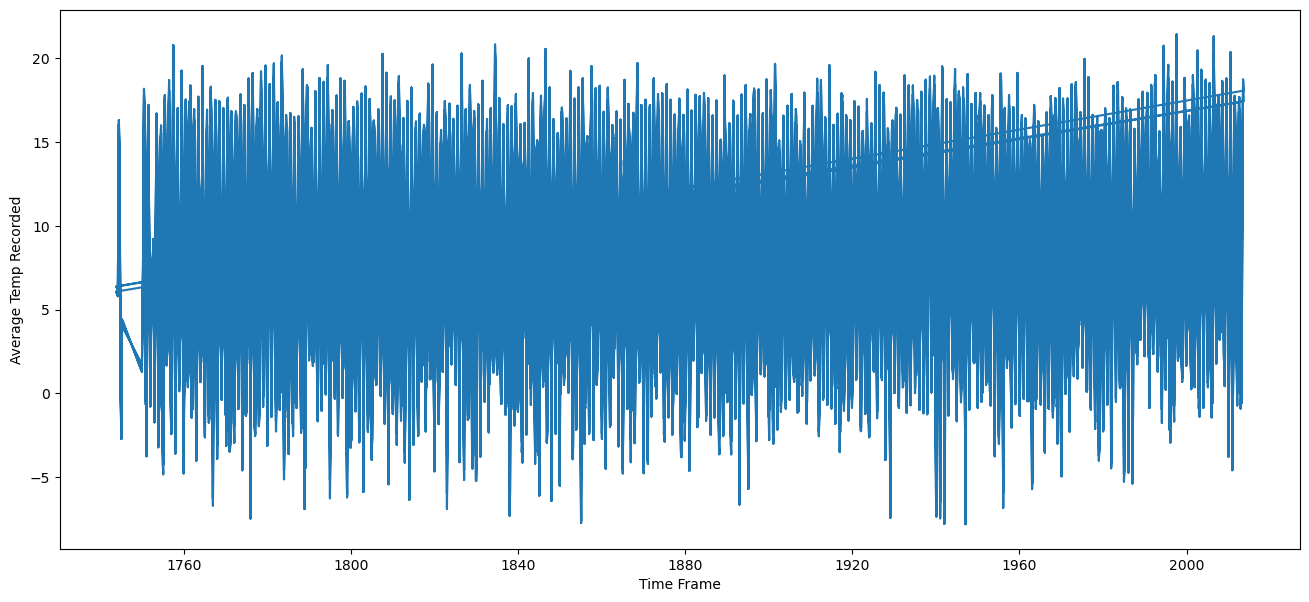

In [29]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)

In [31]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.76443039180071
p-value: 2.3746970456351497e-27
Critial Values:
   1%, -3.430868192869495
Critial Values:
   5%, -2.86176901566292
Critial Values:
   10%, -2.566891900059256
